In [76]:
import pandas as pd
import matplotlib.pyplot as plt


stats = pd.read_excel('ASM_BE_Sales.xlsx')
stats.head()

,ASM_number,ASM_name,Cust_title,Cust_hier,Material_No,Material_title,2012_pcs,2012_rub,2011_pcs,2011_rub
0,94940013.0,Дмитрий_1,VOSTOK-SERVIS,94998078.0,06017A5000,GWS 18-150 L,175.0,1932253.01,NaN,NaN
1,94940013.0,Дмитрий_1,ARVATO RUS,94999400.0,1600Z00041,1x2V2.0Ah+GAL1230,1200.0,1500000.00,NaN,NaN
2,94940013.0,Дмитрий_1,FAMS,94998093.0,06019F8120,GSR 180-LI,144.0,890871.40,409.0,2664509.50
3,94940013.0,Дмитрий_1,FAMS,94998093.0,0611253708,GBH 2-26 DRE + ACC,109.0,773359.95,228.0,1678008.99
4,94940013.0,Дмитрий_1,FAMS,94998093.0,06019F8020,GSR 140-LI,128.0,732048.41,311.0,1802795.07


In [77]:
ASM_sales=stats.groupby('ASM_name').agg(sum)
ASM_sales.reset_index(level=0, inplace=True)
ASM_sales

,ASM_name,ASM_number,Cust_hier,2012_pcs,2012_rub,2011_pcs,2011_rub
0,Александр,4.936925e+09,4.938270e+09,7.0,126047.47,1355.0,7.018159e+06
1,Александр_2,8.221849e+10,8.225495e+10,2428.0,15100753.70,8630.0,5.444934e+07
2,Алексей,1.084224e+11,1.084765e+11,7994.0,44866650.99,27491.0,1.604807e+08
3,Вадим,1.086114e+11,1.086712e+11,5870.0,37949990.80,14390.0,9.122536e+07
4,Вадим_2,7.728118e+10,7.732858e+10,4110.0,25482970.31,15339.0,1.012828e+08
5,Даниил,7.357893e+10,7.361864e+10,6378.0,40788466.80,24482.0,1.584662e+08
6,Дмитрий_1,1.380428e+11,1.381266e+11,6945.0,43243843.58,17700.0,1.122367e+08
7,Дмитрий_2,1.122197e+11,1.122756e+11,7272.0,50959183.46,19219.0,1.250326e+08
8,Иван,1.193406e+11,1.194082e+11,9783.0,58824989.45,24642.0,1.496814e+08
9,Максим,1.068081e+11,1.068635e+11,7270.0,41821059.24,16719.0,1.064953e+08


Text(0.5, 1.0, 'Overall sales by ASM')

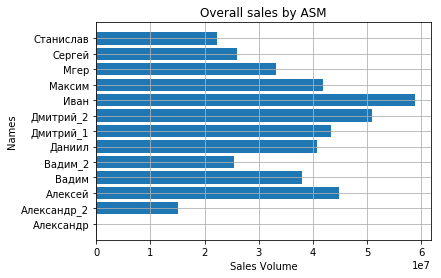

In [78]:
"""Построим график для сравнения обьемов продаж продавцами за определенный период. 
Определим продавца с наибольшим объемом. Берем горизонтальный график для удобства визуального сравнения"""

plt.barh(ASM_sales['ASM_name'], ASM_sales['2012_rub'])
plt.grid()
plt.xlabel('Sales Volume')
plt.ylabel('Names')
plt.title('Overall sales by ASM')

In [79]:
"""Посмотрим на продажи в разрезе компаний у лучшего продавца из предыдущего графика.
График построим с помощью библиотеки seaborn. Возьмем вертикальный график, так как у нас небольшое количество компаний"""

comp=stats[stats['ASM_name']=='Иван'].groupby('Cust_title').agg(sum)
comp.reset_index(level=0, inplace=True)
comp

,Cust_title,ASM_number,Cust_hier,2012_pcs,2012_rub,2011_pcs,2011_rub
0,INIGS,1.784888e+10,1.785983e+10,1435.0,9559688.33,1761.0,11477368.81
1,INSTRUMENT-CENTR,2.392509e+10,2.393961e+10,2826.0,19331550.91,5772.0,39873659.51
2,KAZANCEV AN,6.076213e+09,6.079944e+09,1773.0,9732291.87,4806.0,27736946.06
3,MEGAMASTER EKATERINBURG,1.946287e+10,1.947468e+10,577.0,2257696.22,1105.0,7820962.27
4,MIR INSTRUMENTA,1.367148e+10,1.367977e+10,872.0,5206025.52,2504.0,14055813.46
5,PIKO,1.025361e+10,1.025629e+10,204.0,1243991.58,1095.0,6190561.91
6,PROFTEHSNAB,1.110808e+10,1.111479e+10,792.0,4351681.12,2504.0,14270445.18
7,SPECMONTAZH-2,1.262713e+10,1.263476e+10,553.0,3546474.01,3001.0,19490099.24
8,Torgovaya kompaniya Brozeks,4.367278e+09,4.368499e+09,751.0,3595589.89,2094.0,8765576.49


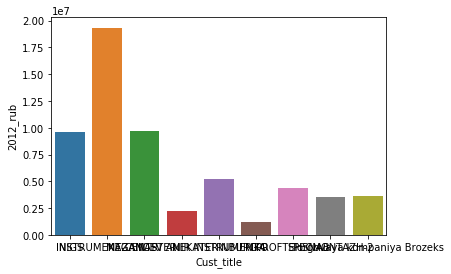

In [80]:
import seaborn as sns
sns.barplot(x='Cust_title', y='2012_rub', data=comp)

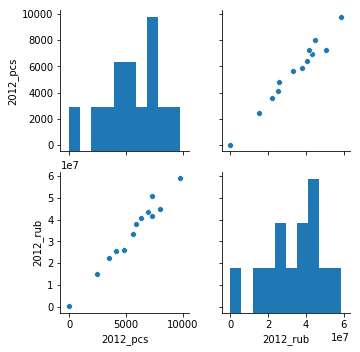

In [81]:
"""Посмотрим,есть ли зависимость между количеством проданного товара и обьемом продаж. 
Возьмем агреггированные данные по каждому продавцу."""
sns.pairplot(
    ASM_sales[['2012_pcs', '2012_rub']])

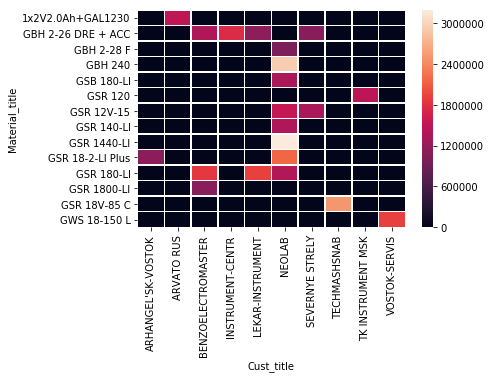

In [82]:
"""Построим тепловую карту по продажам у клиентов в зависимости от модели продукции"""

#Оставим позиции с Обьемом продаж более 1 млн рублей
non_zero=stats[stats['2012_rub']>1000000]

sales_by_products = non_zero.pivot_table(
                        index='Material_title', 
                        columns='Cust_title', 
                        values='2012_rub', 
                        aggfunc=sum).fillna(0).applymap(float)

#sales_by_products
sns.heatmap(sales_by_products, linewidths=0.5)

In [83]:
"""Построим boxplot с помощью plotly для ТОП 5 продуктов, чтобы понять как их покупают клиенты"""

top_products=stats.groupby('Material_title').agg(sum)
top_products=top_products['2012_pcs'].sort_values(ascending = False).head(5).index.values

In [84]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

data = []

for product in top_products:
    data.append(
        go.Box(y=stats[stats.Material_title==product]['2012_pcs'], 
               name=product)
    )
iplot(data, show_link = False)